<h2>Script TP2</h2>
<h3>Assumptions Check</h3>
<h3>Path analysis</h3>
<br> (c) Marie-Eve Picard, Maude Picard, Andreanne Proulx

<h3>Assumptions Check</h3>
<h4>Normality, multicollinearity, singularity</h4>

In [1]:
#import required modules
import pandas as pd 
import numpy as np
import scipy
import scipy.stats as stats
import math
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sn
import statsmodels.api as sm
from sklearn import preprocessing
from statistics import variance
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#set pandas option so that we can see the entire dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

<b>Import the dataset</b>

In [3]:
#Value labels have been remove directly from SPSS using the syntaxe:
#VALUE LABELS ALL

In [3]:
df = pd.read_spss("C:/Users/mepic/OneDrive/Documents/Master/PSY6002/TP/TP2/PSY6002_Cannabis_removeLabels.sav")

In [4]:
#Variables to exclude
ls_excluded = ['status','l','version','dwave','Consent','XAge','Birth','XBirth','Mom_Nat','XMom_Nat', 'Pop_Nat', 'XPop_Nat', 'Country', 'Province','City','XCity','Language','XLanguage','French','English','Nationality','CanNat','OtherNat','Can_Qc','Diploma','Situation','FinalComments','ConsentT2','FinalCommentsT2','ConsentT3','FinalCommentT3','oldq1','oldl','oldhq2','oldq9','oldCountryBirth','oldMotherBirth','oldDadBirth','oldCountry','oleProvince','OldNationality','oleDiploma','oldq11','IdenGroupT2','oldAge', 'IdenGroupT3']
df = df.drop(ls_excluded, axis = 1)

In [5]:
#Regroup variables with a spectific substring in the name
def regroupVar(substr=None, liste=None):
    subs = substr
    res = [i for i in liste if subs in i]
    return res


columns_T2 = regroupVar(substr = 'T2', liste = df.columns)
columns_T3 = regroupVar(substr = 'T3', liste = df.columns)

In [6]:
#Create new Dataframes with variables at different times (T1, T2, T3)
df_T1 = df.drop(columns_T2+columns_T3, axis = 1)
df_T2 = df.filter(items = columns_T2)
df_T3 = df.filter(items = columns_T3)

In [7]:
df_T1.columns

Index(['respid', 'Gender', 'Age', 'life_cond', 'left_right', 'change_trad',
       'Freqnow', 'Userstatus', 'Legal', 'Illegal', 'Quantity', 'Frequency',
       'Attitude_2', 'Attitude_3', 'Attitude_4', 'GQuantity', 'GFrequency',
       'Neg_Pos', 'AffectPerso', 'AffectGroup', 'Rapid_slow', 'Few_Many',
       'Small_Big', 'Comp_1', 'Comp_2', 'Cat', 'Int_2', 'Int_3', 'Int_4',
       'IdentifyPot', 'CommonPot', 'ImpPot', 'Moi_Pot', 'GComp_1', 'GComp_2',
       'GCat', 'GInt_2', 'GInt_3', 'GInt_4', 'GIdentifyPot', 'GcommonPot',
       'GImpPot', 'Can_Pot', 'Qc_Pot', 'SuiviPot', 'Clarity_2', 'Clarity_3',
       'Coherence_1', 'Coherence_3', 'Coherence_4', 'Belong_1', 'Belong_2',
       'Belong_3', 'Safety_1', 'Safety_2', 'Safety_3', 'Comp', 'GComp',
       'IdenPot', 'GIdenPot', 'Attitudes', 'Int', 'GInt', 'Clarity',
       'Coherence', 'Belong', 'Safety'],
      dtype='object')

<h3><b>Compute variables</h3></b>

<b>Cronbach's Alpha</b>

In [8]:
def cronbach_alpha(data=None):
    #Transform dataframe into a correlation matrix
    df_corr = data.corr()
    #Number of variables
    N=data.shape[1]
    #Calculate R
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
        mean_r = np.mean(rs)
    
    calpha = (N * mean_r) / (1 + (N -1) * mean_r)
    return calpha

In [9]:
calpha_Prejuge = cronbach_alpha(data=df_T1.filter(items = ['Attitude_2','Attitude_3','Attitude_4']))
calpha_PercSoc = cronbach_alpha(data=df_T1.filter(items = ['AffectGroup', 'Rapid_slow', 'Few_Many', 'Small_Big']))
calpha_ClarCo = cronbach_alpha(data=df_T1.filter(items = ['Clarity_2', 'Clarity_3','Coherence_1', 'Coherence_3', 'Coherence_4']))
calpha_Need = cronbach_alpha(data=df_T1.filter(items = ['Belong_1', 'Belong_2', 'Belong_3', 'Safety_1', 'Safety_2', 'Safety_3']))
calpha_Perception = cronbach_alpha(data=df_T1.filter(items = ['GQuantity', 'GFrequency']))
calpha_IdenPot = cronbach_alpha(data=df_T1.filter(items = ['IdentifyPot','CommonPot', 'ImpPot']))
calpha_Comp = cronbach_alpha(data=df_T1.filter(items = ['Comp_1', 'Comp_2']))
calpha_Int = cronbach_alpha(data=df_T1.filter(items = ['Int_2', 'Int_3', 'Int_4']))
calpha_GComp = cronbach_alpha(data=df_T1.filter(items = ['GComp_1', 'GComp_2']))
calpha_GInt = cronbach_alpha(data=df_T1.filter(items = ['GInt_2', 'GInt_3', 'GInt_4']))
calpha_GIdenPot = cronbach_alpha(data=df_T1.filter(items = ['GIdentifyPot', 'GcommonPot', 'GImpPot']))

In [10]:
print('Alpha Prejuge: ', calpha_Prejuge, '\nAlpha Perception sociale: ', calpha_PercSoc, '\nAlpha Clarity and coherence: ', calpha_ClarCo, '\nAlpha Besoin: ', calpha_Need, '\nAlpha Perception: ', calpha_Perception, '\nAlpha IdenPot: ', calpha_IdenPot, '\nAlpha Comp: ', calpha_Comp, '\nAlpha Int: ', calpha_Int, '\nAlpha GComp: ', calpha_GComp, '\nAlpha GInt: ', calpha_GInt, '\nAlpha GIdenPot: ', calpha_GIdenPot)

Alpha Prejuge:  0.9112575456759663 
Alpha Perception sociale:  0.7114368467721509 
Alpha Clarity and coherence:  0.7890498853509222 
Alpha Besoin:  0.8298552362699048 
Alpha Perception:  0.9472638125313749 
Alpha IdenPot:  0.8765844710444708 
Alpha Comp:  0.6795205228774275 
Alpha Int:  0.9257010643547255 
Alpha GComp:  0.7516561268244468 
Alpha GInt:  0.9387020952516493 
Alpha GIdenPot:  0.8553292051169327


<b>Compute the Attitude variable (T1)</b>
<br>reverse attitude items and compute the mean

In [11]:
#Create dataframe with only variables from prejudice scale
att_scale_T1 = df_T1.filter(items = ['Attitude_2','Attitude_3','Attitude_4'])

In [12]:
#Create a function to reverse the score
def inversed_score(dataframe = None, high = None):
    dataframe_dummy = dataframe.copy()
    for i in range(len(dataframe_dummy.columns)):
        for j in range (len(dataframe_dummy[dataframe_dummy.columns[0]])):
            dataframe_dummy[dataframe_dummy.columns[i]][j] = high - dataframe_dummy[dataframe_dummy.columns[i]][j]

    return dataframe_dummy

In [13]:
#Reverse Echelle de prejuges
att_scale_T1_inversed = inversed_score(dataframe = att_scale_T1, high = 4)

In [14]:
#Calculate the mean of items in Echelle de prejuges (items 19 a 22)
df_T1["prejuge"] = att_scale_T1_inversed.mean(axis=1, skipna=False)

In [15]:
df_T1['prejuge'].head()

0    1.333333
1    3.333333
2    1.666667
3    1.333333
4    2.000000
Name: prejuge, dtype: float64

In [16]:
def compute_mean(dataframe=None, cols = None, col_name = None):
    dataframe[col_name] = dataframe[cols].mean(axis = 1)

    return dataframe

In [17]:
#Compute perception du changement social (items 27,28,29,29)
df_T1 = compute_mean(dataframe = df_T1, cols = ['AffectGroup', 'Rapid_slow', 'Few_Many', 'Small_Big'], col_name = 'perc_soc')
#Compute clarity and coherence (items 46 a 52)
df_T1 = compute_mean(dataframe = df_T1, cols = ['Clarity','Coherence'], col_name = 'clar_co')
#Compute Besoin (items 53  a 60)
df_T1 = compute_mean(dataframe = df_T1, cols = ['Belong','Safety'], col_name = 'need')
#Compute perception (items 23, 24)
df_T1 = compute_mean(dataframe = df_T1, cols = ['GQuantity', 'GFrequency'], col_name = 'perception')

In [18]:
df_T1.columns

Index(['respid', 'Gender', 'Age', 'life_cond', 'left_right', 'change_trad',
       'Freqnow', 'Userstatus', 'Legal', 'Illegal', 'Quantity', 'Frequency',
       'Attitude_2', 'Attitude_3', 'Attitude_4', 'GQuantity', 'GFrequency',
       'Neg_Pos', 'AffectPerso', 'AffectGroup', 'Rapid_slow', 'Few_Many',
       'Small_Big', 'Comp_1', 'Comp_2', 'Cat', 'Int_2', 'Int_3', 'Int_4',
       'IdentifyPot', 'CommonPot', 'ImpPot', 'Moi_Pot', 'GComp_1', 'GComp_2',
       'GCat', 'GInt_2', 'GInt_3', 'GInt_4', 'GIdentifyPot', 'GcommonPot',
       'GImpPot', 'Can_Pot', 'Qc_Pot', 'SuiviPot', 'Clarity_2', 'Clarity_3',
       'Coherence_1', 'Coherence_3', 'Coherence_4', 'Belong_1', 'Belong_2',
       'Belong_3', 'Safety_1', 'Safety_2', 'Safety_3', 'Comp', 'GComp',
       'IdenPot', 'GIdenPot', 'Attitudes', 'Int', 'GInt', 'Clarity',
       'Coherence', 'Belong', 'Safety', 'prejuge', 'perc_soc', 'clar_co',
       'need', 'perception'],
      dtype='object')

<b>Create a dataframe with the computed variables</b>

In [19]:
ls_excluded_T1 = ['Attitude_2','Attitude_3', 'Attitude_4', 'Attitudes','GQuantity','GFrequency','AffectGroup', 'Rapid_slow', 'Few_Many', 'Small_Big', 'Comp_1', 'Comp_2', 'Int_2', 'Int_3', 'Int_4', 'IdentifyPot','CommonPot', 'ImpPot', 'GComp_1', 'GComp_2', 'GInt_2', 'GInt_3', 'GInt_4', 'GIdentifyPot', 'GcommonPot', 'GImpPot', 'Clarity_2', 'Clarity_3','Coherence_1', 'Coherence_3', 'Coherence_4', 'Belong_1', 'Belong_2','Belong_3', 'Safety_1', 'Safety_2', 'Safety_3','Clarity','Coherence', 'Belong', 'Safety']

In [20]:
df_T1_compute = df_T1.drop(ls_excluded_T1, axis = 1)

In [21]:
#Change type of categorical variables (now they are consider as continuous variables)
df_T1_compute['Freqnow'] = df_T1['Freqnow'].astype('category')
df_T1_compute['Userstatus'] = df_T1['Userstatus'].astype('category')
#Transform Gender into categorical variable
df_T1_compute['Gender'] = df_T1['Gender'].astype("category")

<h3><b>Correlation Matrix</b></h3>
The correlation matrix was computed in order to build our model

In [22]:
#Exclude age (we are not interested in demographical variables for the model)
df_T1_compute_dropna = df_T1_compute.drop(['Age','respid'], axis = 1).dropna()

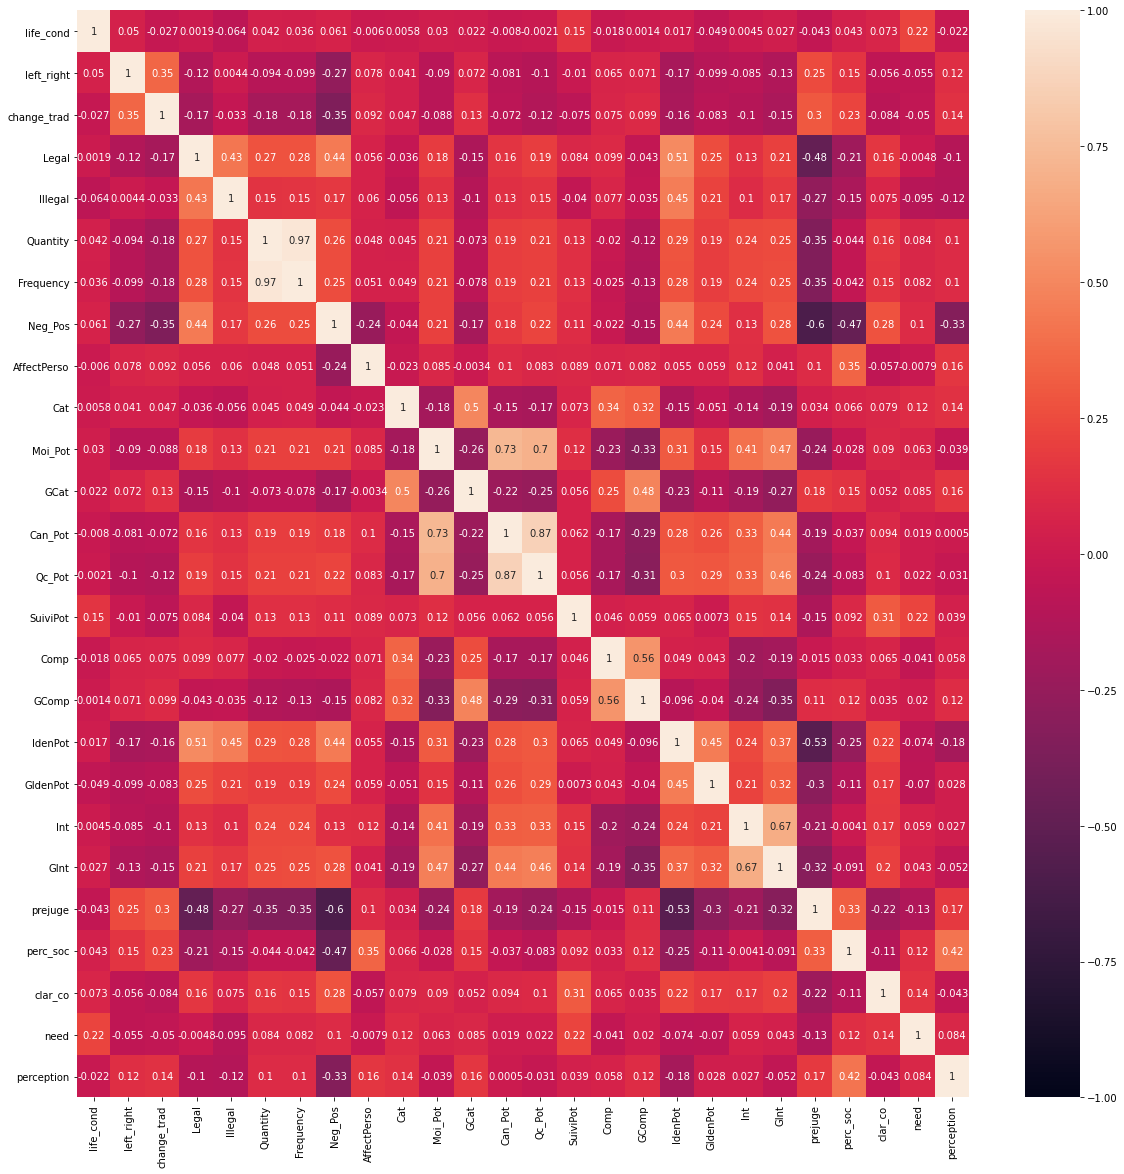

In [23]:
corr_matrix = df_T1_compute_dropna.corr(method = 'pearson')

f, ax = plt.subplots(figsize=(20, 20))
ax = sn.heatmap(corr_matrix, annot = True, vmin = -1.0, vmax = 1.0)

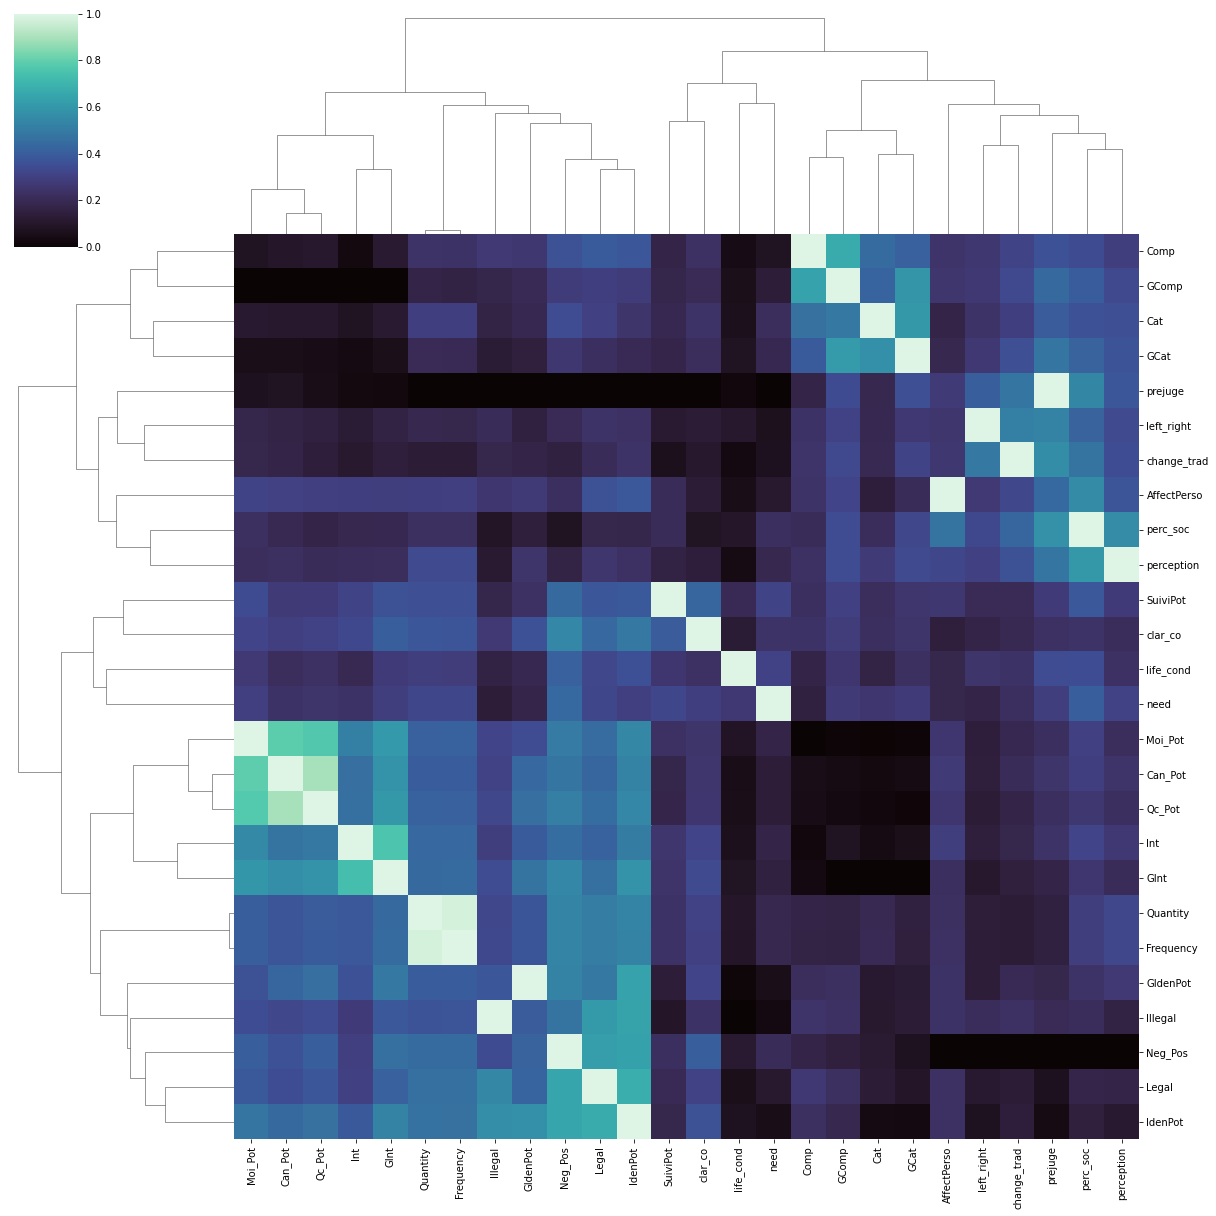

In [24]:
#Clustering
g = sn.clustermap(corr_matrix, cmap="mako",  standard_scale =1)
fig = plt.gcf()
fig.set_size_inches(18, 18);

In [25]:
#Check correlation values above 0.2 and below -0.2
#Access columns
df_corr = pd.DataFrame(columns=['Var1','Var2','Value'])
for i in range (len(corr_matrix)):
    #Access rows
    for j in range (len(corr_matrix)):
        if corr_matrix[corr_matrix.columns[i]][j] > 0.2 or corr_matrix[corr_matrix.columns[i]][j] < -0.2:
            if corr_matrix[corr_matrix.columns[i]][j] != 1:
                df_corr=df_corr.append({'Var1': corr_matrix.columns[i], 'Var2': corr_matrix.index[j], 'Value': corr_matrix[corr_matrix.columns[i]][j]}, ignore_index = True)

In [26]:
df_corr.to_csv('corr.csv', index=False)

In [27]:
corr_matrix.to_csv('matrix.csv', index = True)

<h2><b>Model Choice</h2></b>
<br>Variables included in the model: 
<li>prejuge : exogene</li>
<li>IdenPot : exogene</li>
<li>perception : endogene</li>
<li>Neg_pos : endogene</li>

In [28]:
df_model = df_T1.filter(items = ['Gender','Age','Neg_Pos','IdentifyPot','CommonPot','ImpPot','IdenPot','Attitude_2','Attitude_3','Attitude_4','prejuge','GQuantity','GFrequency','perception'])

In [29]:
def add_skew_kurt_missing(dataframe = None):
    des1 = dataframe.describe(include='all')
    des2 = dataframe.isnull().sum().to_frame(name = 'missing').T
    des3 = dataframe.skew(axis=0,skipna=True).to_frame(name = 'skewness').T
    des4 = dataframe.kurtosis(axis=0,skipna=True).to_frame(name = 'kurtosis').T

    return pd.concat([des1, des2, des3, des4])

In [30]:
add_skew_kurt_missing(df_model)

,Gender,Age,Neg_Pos,IdentifyPot,CommonPot,ImpPot,IdenPot,Attitude_2,Attitude_3,Attitude_4,prejuge,GQuantity,GFrequency,perception
count,1682.000000,1657.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,1.459572,50.905250,1.784780,0.788347,0.783591,0.407253,0.659730,1.368609,2.093341,1.989893,2.182719,2.772295,2.771700,2.771998
std,0.499703,15.376517,1.209247,1.034403,1.011306,0.831429,0.862029,1.246879,1.270248,1.296320,1.171934,0.923546,0.928859,0.902706
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.333333,2.000000,2.000000,2.000000
50%,1.000000,52.000000,2.000000,0.000000,0.000000,0.000000,0.333333,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
75%,2.000000,64.000000,3.000000,2.000000,2.000000,0.000000,1.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.500000
max,3.000000,91.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
missing,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skewness,0.176707,-0.099403,0.026225,1.090242,1.068305,2.204840,1.338714,0.443568,-0.281842,-0.201050,0.026192,-0.368743,-0.379512,-0.378909


In [31]:
df_model = df_model.filter(items = ['Neg_Pos','prejuge','IdenPot','perception'])

In [32]:
#Compute variance
for i in range(len(df_model.columns)):
    var = variance(df_model[df_model.columns[i]])  
    print(df_model.columns[i], " : ", var)

Neg_Pos  :  1.462278624990362
prejuge  :  1.3734284676160762
IdenPot  :  0.7430941701604017
perception  :  0.8148786960086184


In [33]:
1.462278624990362/0.7430941701604017

1.967824111276125

<h3>Z score (univariate outlier)</h3>

In [34]:
#Create an empty dataframe for zscores
df_zscores = pd.DataFrame(columns = df_model.columns)
#Calculate z scores(univariate outliers) for all variables
i=0
while i < len(df_model.columns):
    if df_model.columns[i] == df_zscores.columns[i]:
        df_zscores[df_zscores.columns[i]] = stats.zscore(df_model[df_model.columns[i]], nan_policy='omit')
        i+=1
    else:
        print('error')
        break

df_zscores.head(5)

,Neg_Pos,prejuge,IdenPot,perception
0,-1.476382,-0.724988,-0.765550,1.360761
1,0.178031,0.982100,-0.765550,0.252652
2,0.178031,-0.440474,-0.765550,1.360761
3,-0.649175,-0.724988,-0.765550,1.360761
4,0.178031,-0.155959,1.555247,-0.855458


In [35]:
for i in range(len(df_zscores.columns)):
    v_min = df_zscores[df_zscores.columns[i]].min(skipna = True)
    v_max = df_zscores[df_zscores.columns[i]].max()
    print(df_zscores.columns[i], ": ", "min = ", v_min, " max = ", v_max)

Neg_Pos :  min =  -1.4763820950374502  max =  1.8324449320817917
prejuge :  min =  -1.8630475632748733  max =  1.5511300304367708
IdenPot :  min =  -0.765550352719613  max =  3.8760442160075326
perception :  min =  -3.071676749624781  max =  1.3607610351420878


In [36]:
ls_unioutlier = []
for i in range(len(df_zscores['IdenPot'])):
    if df_zscores['IdenPot'][i] > 3.29:
        ls_unioutlier.append(df_zscores['IdenPot'][i])
        print(i, " ", df_model['IdenPot'][i])
    
print(ls_unioutlier, '\n\n', len(ls_unioutlier))

202   4.0
276   3.6666666666666665
574   4.0
604   3.6666666666666665
776   4.0
921   4.0
1133   3.6666666666666665
1295   4.0
1299   4.0
1366   3.6666666666666665
1402   4.0
1432   4.0
1477   4.0
1562   4.0
1581   3.6666666666666665
1594   4.0
[3.8760442160075326, 3.4892446686136034, 3.8760442160075326, 3.4892446686136034, 3.8760442160075326, 3.8760442160075326, 3.4892446686136034, 3.8760442160075326, 3.8760442160075326, 3.4892446686136034, 3.8760442160075326, 3.8760442160075326, 3.8760442160075326, 3.8760442160075326, 3.4892446686136034, 3.8760442160075326] 

 16


<h3><b>Multivariate outliers</b></h3>
<br> Mahalanobis Distance: D^2 = (x-m)^T . C^(-1) . (x-m)
<br>
<br> D^2 := Square of the Mahalanobis distance
<br> x := vector of the observations
<br> m := vector of mean values of IV
<br> C^(-1) := inverse covariance matrix of IV
<br> . := dot product

In [37]:
def mahalanobis_outliers(x=None, data=None, cov=None, dfreed=None, sign = None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    data['mahal_square'] = np.power(md, 2)

    chi_critic = stats.chi2.ppf((1-sign), df = dfreed)

    ls_multioutliers = []

    for i in range (1682):
        try:
            if data['mahal_square'][i] > chi_critic:
                ls_multioutliers.append(i+1)
        except:
            continue

    data = data.drop(['mahal_square'], axis = 1)

    return data, ls_multioutliers, chi_critic


df_model, ls_multiout, chi = mahalanobis_outliers(x = df_model, data = df_model, dfreed = len(df_model.columns) - 1, sign = 0.001)
print('participants outliers: ', ls_multiout, '\nChi2 critique: ', chi)

participants outliers:  [12, 30, 82, 91, 203, 219, 224, 240, 287, 292, 434, 530, 543, 569, 575, 577, 706, 777, 875, 922, 975, 995, 1018, 1029, 1223, 1289, 1300, 1367, 1396, 1403, 1425, 1433, 1453, 1478, 1500, 1535, 1538, 1556, 1563, 1595, 1680] 
Chi2 critique:  16.26623619623813


In [38]:
print(len(ls_multiout))

41


<h3>Bivariate relationship linearity</h3>

In [39]:
def residual_plot(dataframe = None, VI = None, VD = None):
    model = sm.OLS(dataframe[VD], sm.add_constant(dataframe[VI])).fit()
    ypred = model.predict()
    standardized_yresid = preprocessing.scale(model.resid)
    standardized_ypred = preprocessing.scale(ypred)
    plt.scatter(standardized_ypred, standardized_yresid)
    plt.plot([min(standardized_ypred),max(standardized_ypred)],[0,0])
    plt.suptitle('VD : {} - VI : {}'.format(VD, VI))
    plt.xlabel('Régression Valeur prédite standardisée')
    plt.ylabel('Régression Résiduel standardisé')

    return standardized_yresid

In [40]:
def residual_hist(stand_res = None, VD = None):
    _, bins, _ = plt.hist(stand_res, bins = 15, range=(-3,1), density = 1, alpha = 0.5)
    mu, sigma = stats.norm.fit(stand_res)
    best_fit_line = stats.norm.pdf(bins, mu, sigma)
    plt.suptitle('Variable dépendante : ' + VD)
    plt.xlabel('Régression Résiduel standardisé')
    plt.ylabel('Fréquence')
    plt.plot(bins, best_fit_line)

<b>IdenPot and Neg_Pos</b>

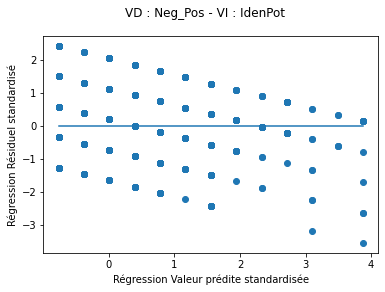

In [41]:
res_1 = residual_plot(dataframe = df_model, VI = 'IdenPot', VD = 'Neg_Pos')

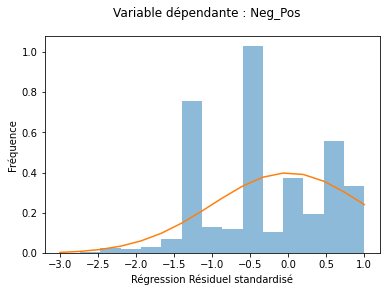

In [42]:
residual_hist(stand_res = res_1, VD = 'Neg_Pos')

<b>IdenPot and Prejuge</b>

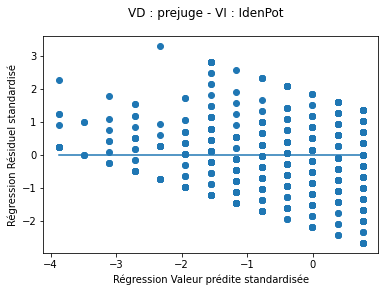

In [45]:
res_2 = residual_plot(dataframe = df_model, VI = 'IdenPot', VD = 'prejuge')

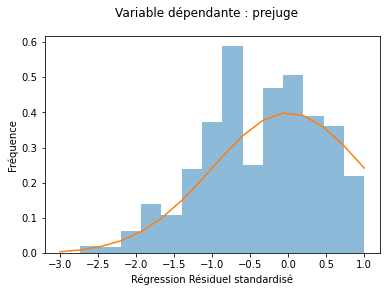

In [46]:
residual_hist(stand_res = res_2, VD = 'prejuge')

<b>Neg_Pos and Prejuge</b>

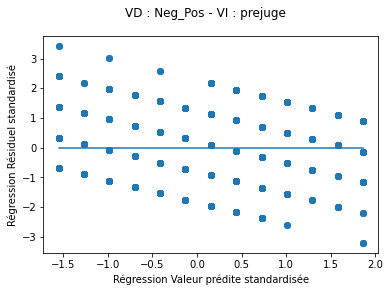

In [47]:
res_3 = residual_plot(dataframe = df_model, VI = 'prejuge', VD = 'Neg_Pos')

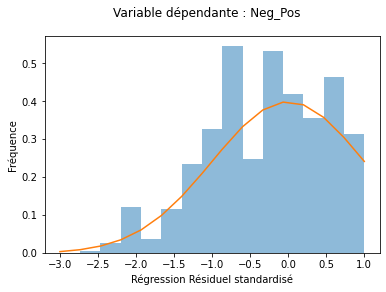

In [48]:
residual_hist(stand_res = res_3, VD = 'Neg_Pos')

<b>Perception and Prejuge</b>

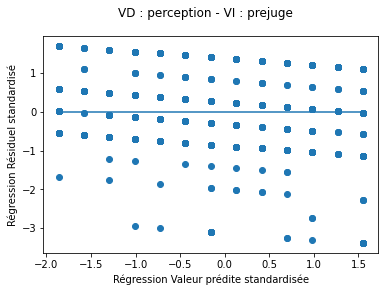

In [49]:
res_4 = residual_plot(dataframe = df_model, VI = 'prejuge', VD = 'perception')

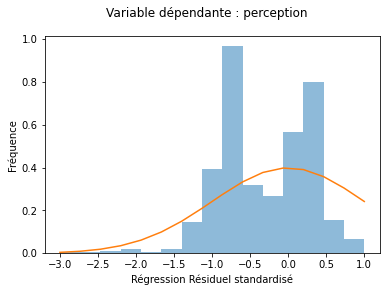

In [50]:
residual_hist(stand_res = res_4, VD = 'perception')

<b>Perception and IdenPot</b>

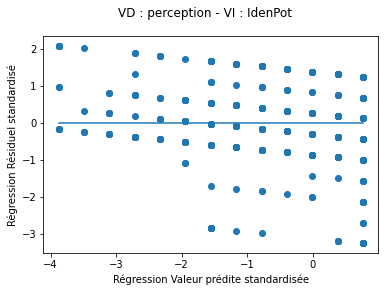

In [51]:
res_5 = residual_plot(dataframe = df_model, VI = 'IdenPot', VD = 'perception')

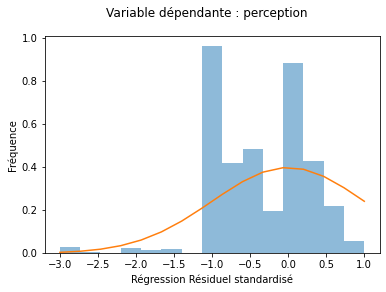

In [52]:
residual_hist(stand_res = res_5, VD = 'perception')

<b>Perception and Neg_Pos</b>

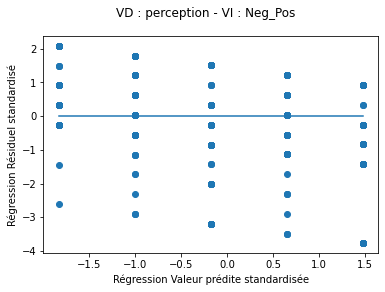

In [53]:
res_6 = residual_plot(dataframe = df_model, VI = 'Neg_Pos', VD = 'perception')

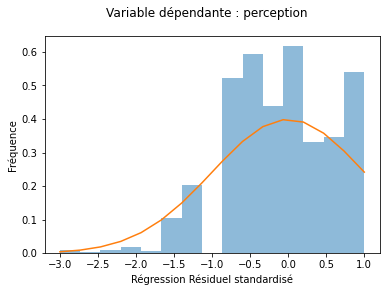

In [54]:
residual_hist(stand_res = res_6, VD = 'perception')

<h3>Multicollinearity and singularity</h3>

<b>VIF</b>

In [52]:
#Compute VIF
def compute_vif(data = None):
    vif_data = pd.DataFrame()
    vif_data['Features'] = data.columns
    #Compute VIF for each IVs
    vif_data['VIF'] = [variance_inflation_factor(data.values, i)
    for i in range(len(data.columns))]

    return vif_data

df_constant = add_constant(df_model.dropna())
compute_vif(df_constant)

,Features,VIF
0,const,32.924932
1,Neg_Pos,1.736767
2,att_mean,1.806960
3,IdenPot,1.446523
4,percep,1.127880


<b>Condition index</b>

In [ ]:
s = np.linalg.svd(x, compute_uv = False)
r = s[...,0]/s[...,-1]
cind = []
for i in range(s.shape[0]):
    cind.append(s[...,0]/s[...,i])

cind

In [ ]:
def compute_condind(data = None):
    ls_condind = []
    X_t = data.transpose()
    XX_t = X_t.dot(data)
    eigValues, eigVectors = np.linalg.eig(XX_t)
    idx = eigValues.argsort()[::-1]
    eigValues = eigValues[idx]
    
    for i in range (eigValues.shape[0]):
        ls_condind.append(math.sqrt(eigValues[0]/eigValues[i]))
        
    return ls_condind

In [ ]:
compute_condind(preprocessing.normalize(np.asarray(df_constant)))

Incongruence between SPSS output and python output for the condition indexes 

<b>Matrix Determinant</b>

In [53]:
def compute_determinant_corr(df):
    x_corr = df.corr()
    corr_det = np.linalg.det(x_corr)
    return print(corr_det)

compute_determinant_corr(df_model)

0.39629294570808093
